## Implementation of Unsupervised Machine Learning to create clusters in main-game dataset

### Background
In this research I would like to implement unsupervised machine learning in main-games dataset. The reasons that unsupervised machine learning was used because the dataset was tabular and unlabbeled. Unsupervised machine learning will help to create cluster so the scientist would be easier to identify the characteristic from the dataset. The algorithm that will be used in this research is k-means, k-means will creat centroids randomly based on the distances of the data. Some of the ways k-means measures the distance was called euclidean distance manhattan distance and minkowski distance. Otherwise by default k-means was using euclidean distance for the nearest data measurement.

In [89]:
#  Library for this research
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import warnings
warnings.filterwarnings('ignore') 
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.preprocessing import scale 
from sklearn import decomposition

## Dataset description
The dataset was consisted from 631 rows and 127 columns and from that information I could assign the dataset as high dimensional data. The next step to make the analysis easier is by implementing dimentionality reduction using Principal Component Analysis(PCA). Otherwise before I go further for the PCA I would like to break down the dataset information first so I can get better understanding regarding the dataset characteristics.

## Loading the dataset

In [90]:
# Using pandas to load dataset
df = pd.read_csv('game_dataset.csv') 
df

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751.0,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781.0,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire 0 Battlegrounds,68246.0,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037.0,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire 0 Battlegrounds,15416.0,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,942,VN,Male,PUBG,330969.0,182,0.001082,0.534637,0.399738,0.548851,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,943,VN,Male,MU Online,33450.0,102,817000.000000,0.664025,0.597952,0.578953,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,944,VN,Male,Age of Empires,29000.0,103,0.000724,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,945,VN,Female,PUBG,19771.0,143,0.000433,0.600844,0.364150,0.516497,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


The tabel of dataset above was showed that it has 631 rows and 127 columns

In [91]:
# This code was used to check datset features distribution in general
df.skew()

Unnamed: 0                              0.083286
Total Follower                          7.011247
Broadcast Hours                         1.927899
PaidStarPerWatchedHour                  8.701714
Character_Facet_Cont_Rigidity          -0.098683
                                          ...   
Character_Facet_Cont_Cautiousness       0.131078
Role_Curator                            0.061060
Personal_Values_Cont_Conservation      -0.918966
Self_Esteem_Cont_SELevelIntelligence   -1.719117
Temperament_Centric                     0.714966
Length: 123, dtype: float64

In [92]:
# Show up dataset only for the top five rows
df.head()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751.0,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781.0,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire 0 Battlegrounds,68246.0,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037.0,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire 0 Battlegrounds,15416.0,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


In [93]:
# Loading Dataset only from the bottom five rows 
df.tail()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
626,942,VN,Male,PUBG,330969.0,182,0.001082,0.534637,0.399738,0.548851,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,943,VN,Male,MU Online,33450.0,102,817000.000000,0.664025,0.597952,0.578953,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,944,VN,Male,Age of Empires,29000.0,103,0.000724,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,945,VN,Female,PUBG,19771.0,143,0.000433,0.600844,0.364150,0.516497,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125
630,946,VN,Male,League of Legends,515000.0,105,0.002266,0.664025,0.597952,0.578953,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625


In [94]:
# This code was used to show up all features in dataset
df.select_dtypes(include=np.number).columns.tolist()

['Unnamed: 0',
 'Total Follower',
 'Broadcast Hours',
 'PaidStarPerWatchedHour',
 'Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Personal_Values_Facet_Cont_Hedonism',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Temperament_Choleric',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Character_Facet_Cont_ArtisticInterests',
 'Temperament_Sanguine',
 'Character_Facet_Cont_Friendliness',
 'Temperament_Diligent',
 'Self_Esteem_Cont_SELevel',
 'Character_Cont_Extraversion',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Character_Facet_Cont_Adventurousness',
 'Role_Craftsman',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Role_Toastmaster',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Role_Marshal',
 'Self_Esteem_Cont_SELevelAchievements',
 'Self_Est

In [95]:
# This code will give information regarding metadata in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Columns: 127 entries, Unnamed: 0 to Temperament_Centric
dtypes: float64(121), int64(2), object(4)
memory usage: 626.2+ KB


In [96]:
# This code will give more information from the dataset in statistical ways
df.describe()

,Unnamed: 0,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
count,631.000000,6.300000e+02,631.000000,629.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,465.057052,2.197441e+05,127.870048,11627.992968,0.602272,0.511264,0.504968,0.495829,0.475071,0.398333,...,0.486182,0.483384,0.354377,0.628526,0.498150,0.509117,0.264708,0.299209,0.769686,0.330626
std,313.809365,5.532738e+05,53.127032,96905.025828,0.098965,0.132756,0.110216,0.099318,0.089500,0.093354,...,0.072933,0.133083,0.052241,0.113400,0.095051,0.132999,0.115095,0.007841,0.059291,0.231695
min,0.000000,0.000000e+00,0.000000,0.000000,0.238194,0.092290,0.203574,0.176896,0.192784,0.136315,...,0.333361,0.089912,0.153680,0.342775,0.214129,0.131429,0.000000,0.267636,0.302305,0.000000
25%,160.500000,2.582925e+04,92.000000,0.000949,0.548895,0.378814,0.438643,0.437895,0.418463,0.350123,...,0.429169,0.397342,0.329644,0.523061,0.412747,0.387027,0.179912,0.292658,0.742862,0.125000
50%,432.000000,7.543700e+04,113.000000,0.002836,0.592589,0.523694,0.538550,0.505687,0.488704,0.389375,...,0.471135,0.474822,0.341652,0.660061,0.496871,0.512096,0.247404,0.301182,0.776426,0.250000
75%,787.500000,1.680880e+05,151.500000,0.007577,0.668015,0.615077,0.571307,0.567108,0.523962,0.450524,...,0.544211,0.586773,0.377048,0.721947,0.555224,0.613752,0.367443,0.304341,0.807230,0.500000
max,946.000000,7.075717e+06,571.000000,983000.000000,0.869732,0.803543,0.853163,0.783423,0.732078,0.677443,...,0.671015,0.832664,0.598359,0.838676,0.786141,0.910022,0.601515,0.323636,0.897407,1.000000


In [97]:
# This code was used to check missing value from the dataset
df.isna().sum()

Unnamed: 0                              0
Country                                 0
Gender                                  1
Game                                    2
Total Follower                          1
                                       ..
Character_Facet_Cont_Cautiousness       0
Role_Curator                            0
Personal_Values_Cont_Conservation       0
Self_Esteem_Cont_SELevelIntelligence    0
Temperament_Centric                     0
Length: 127, dtype: int64

Based on the code that was run above we could get the information which stated that the main-game dataset contains missing value in columns gender, game, and total follower. In the next step before we process this data to the unsupervised machine learning we have to handle the missing value so the data can be processed in k-means.

In [98]:
# Creating copy for the dataset
df_copy = df[['Unnamed: 0',
 'Total Follower',
 'Broadcast Hours',
 'PaidStarPerWatchedHour',
 'Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Personal_Values_Facet_Cont_Hedonism',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Temperament_Choleric',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Character_Facet_Cont_ArtisticInterests',
 'Temperament_Sanguine',
 'Character_Facet_Cont_Friendliness',
 'Temperament_Diligent',
 'Self_Esteem_Cont_SELevel',
 'Character_Cont_Extraversion',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Character_Facet_Cont_Adventurousness',
 'Role_Craftsman',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Role_Toastmaster',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Role_Marshal',
 'Self_Esteem_Cont_SELevelAchievements',
 'Self_Esteem_Cont_SEDiscrepancySociability',
 'Personal_Values_Cont_SelfEnhancement',
 'Self_Esteem_Cont_SEAspiration',
 'Role_Supplier',
 'Character_Facet_Cont_Activity',
 'Temperament_Stable',
 'Personal_Values_Facet_Cont_PowerResources',
 'Self_Esteem_Cont_SEDiscrepancyAchievements',
 'Temperament_Melancholic',
 'Character_Cont_Openness',
 'Character_Facet_Cont_Anxiety',
 'Role_Administrator',
 'Character_Facet_Cont_Emotionality',
 'Role_Innovator',
 'Role_Partygoer',
 'Self_Esteem_Cont_SEAspirationSociability',
 'Role_Guru',
 'Personal_Values_Facet_Cont_SelfDirectionThought',
 'Temperament_Phlegmatic',
 'Personal_Values_Facet_Cont_Reputation',
 'Role_Guardian',
 'Role_Keeper',
 'Character_Facet_Cont_Tension',
 'Character_Facet_Cont_Altruism',
 'Personal_Values_Facet_Cont_SecuritySocietal',
 'Self_Esteem_Cont_SEAspirationAchievements',
 'Self_Esteem_Cont_SEAspirationOriginality',
 'Personal_Values_Facet_Cont_Humility',
 'Character_Facet_Cont_Orderliness',
 'Role_Manager',
 'Personal_Values_Facet_Cont_Stimulation',
 'Character_Cont_Neuroticism',
 'Self_Esteem_Cont_SELevelConfidence',
 'Self_Esteem_Cont_SEAspirationConfidence',
 'Role_WiseMan',
 'Self_Esteem_Cont_SEDiscrepancyConfidence',
 'Role_Assistant',
 'Self_Esteem_Cont_SEDiscrepancy',
 'Personal_Values_Facet_Cont_ConformityRules',
 'Self_Esteem_Cont_SEAspirationIntelligence',
 'Self_Esteem_Cont_SELevelSociability',
 'Role_Healer',
 'Role_Operator',
 'Self_Esteem_Cont_SEDiscrepancyAppearance',
 'Personal_Values_Facet_Cont_ConformityInterpersonal',
 'Character_Facet_Cont_Modesty',
 'Self_Esteem_Cont_SEDiscrepancyOriginality',
 'Character_Facet_Cont_Imagination',
 'Role_Coach',
 'Role_RightsDefender',
 'Role_Philanthropist',
 'Personal_Values_Facet_Cont_SelfDirectionAction',
 'Role_Promoter',
 'Personal_Values_Facet_Cont_SecurityPersonal',
 'Personal_Values_Facet_Cont_UniversalismConcern',
 'Role_Advisor',
 'Self_Esteem_Cont_SELevelOriginality',
 'Role_Analyst',
 'Personal_Values_Cont_SelfTranscendence',
 'Personal_Values_Facet_Cont_Achievement',
 'Character_Facet_Cont_Trust',
 'Temperament_Unstable',
 'Character_Cont_Agreeableness',
 'Role_Inventor',
 'Personal_Values_Facet_Cont_BenevolenceCaring',
 'Personal_Values_Facet_Cont_BenevolenceDependability',
 'Character_Facet_Cont_Vulnerability',
 'Character_Facet_Cont_ExcitementSeeking',
 'Role_Designer',
 'Role_Deputy',
 'Personal_Values_Cont_OpennessToChange',
 'PaidStarPerWatchedHour.1',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_Depression',
 'Role_Strategist',
 'Role_Inspector',
 'Self_Esteem_Cont_SEAspirationAppearance',
 'Character_Facet_Cont_SelfDiscipline',
 'Self_Esteem_Cont_SEDiscrepancyIntelligence',
 'Role_Companion',
 'Character_Facet_Cont_Cooperation',
 'Role_Commander',
 'Role_Activist',
 'Personal_Values_Facet_Cont_UniversalismNature',
 'Role_Charismatic',
 'Personal_Values_Facet_Cont_Tradition',
 'Self_Esteem_Cont_SELevelAppearance',
 'Character_Facet_Cont_Assertiveness',
 'Character_Facet_Cont_Cautiousness',
 'Role_Curator',
 'Personal_Values_Cont_Conservation',
 'Self_Esteem_Cont_SELevelIntelligence',
 'Temperament_Centric']]

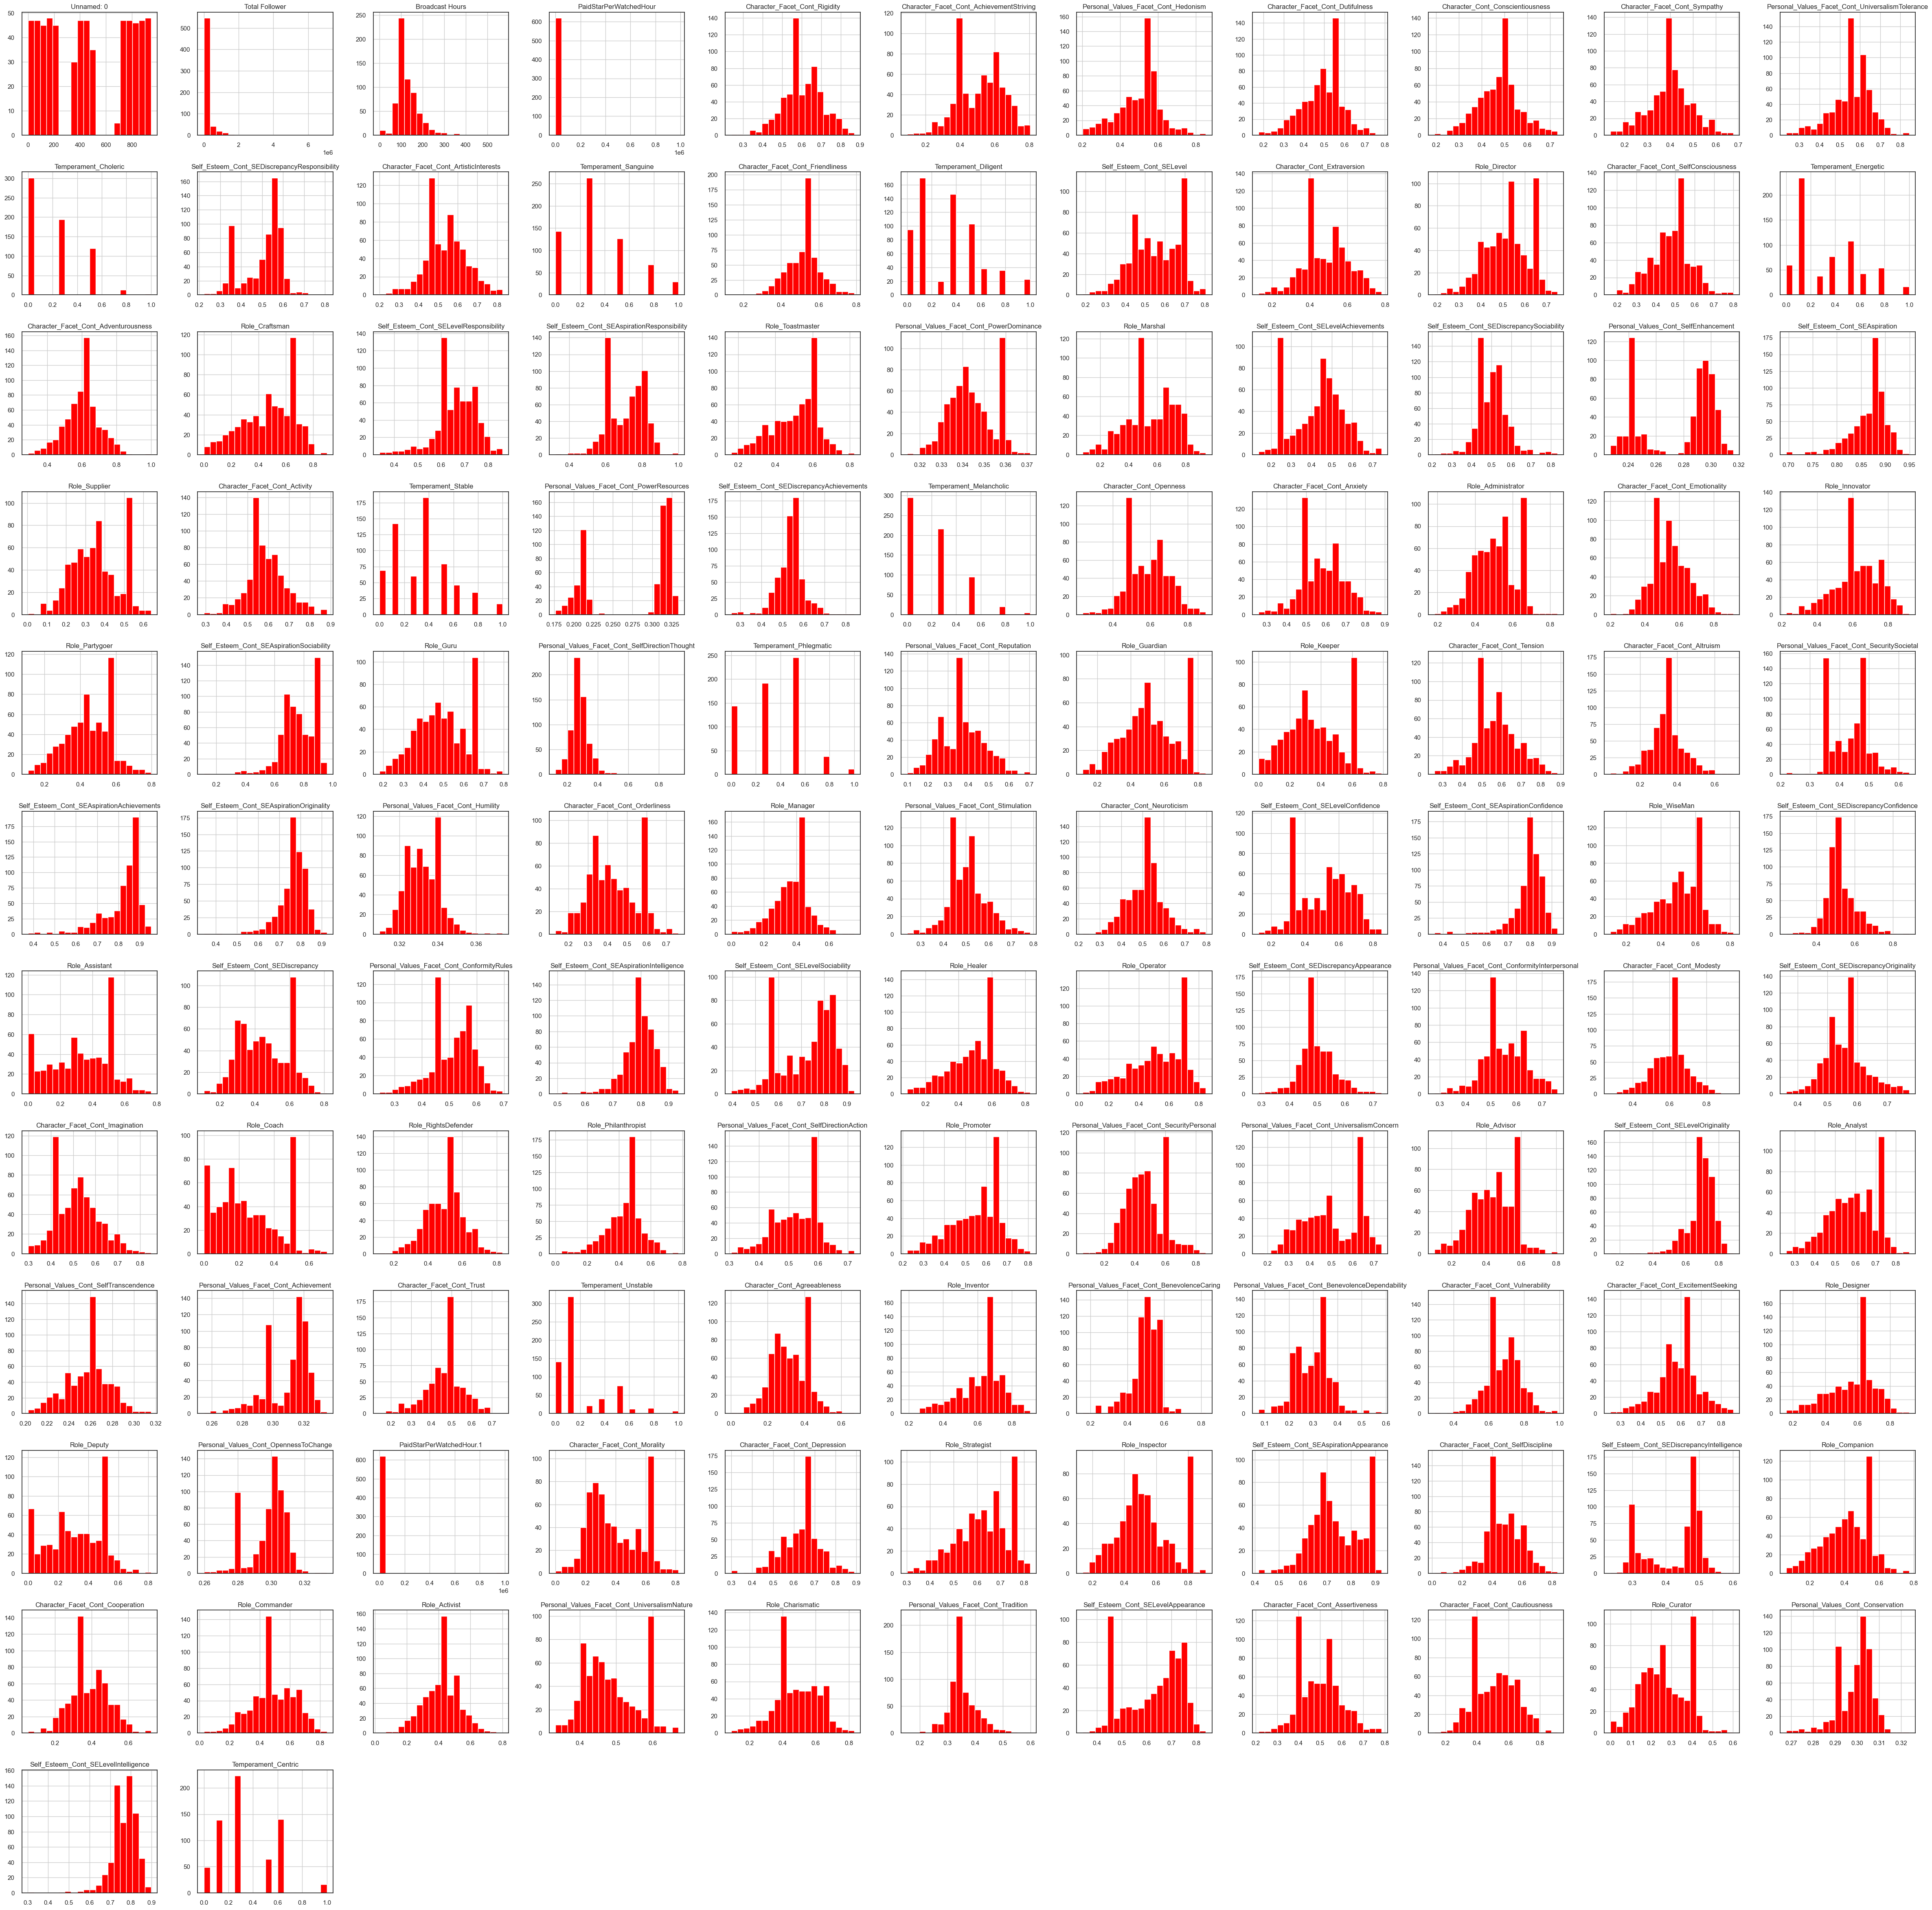

In [99]:
# This code was used to show the distribution data of each feature from the dataset
sns.set(style='white',font_scale=1, rc={'figure.figsize':(60,60)})
ax=df.hist(bins=20,color='red' )

The graphs above were showing the type of distributions on each feature in main-game dataset. As what we mention earlier that we already found out feature column total follower contains missing value and it should be handled. Because the distribution of that feature column was skewed the handling missing value strategy that I was going to use was median. In addition mean strategy can only be used for the data that was normally distributed

In [100]:
# Defining scatter code for data visualization
def scatters(df_copy, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Total Follower",y="Broadcast Hours", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Broadcast Hours",y="Total Follower", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Role_Director",y="Broadcast Hours", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

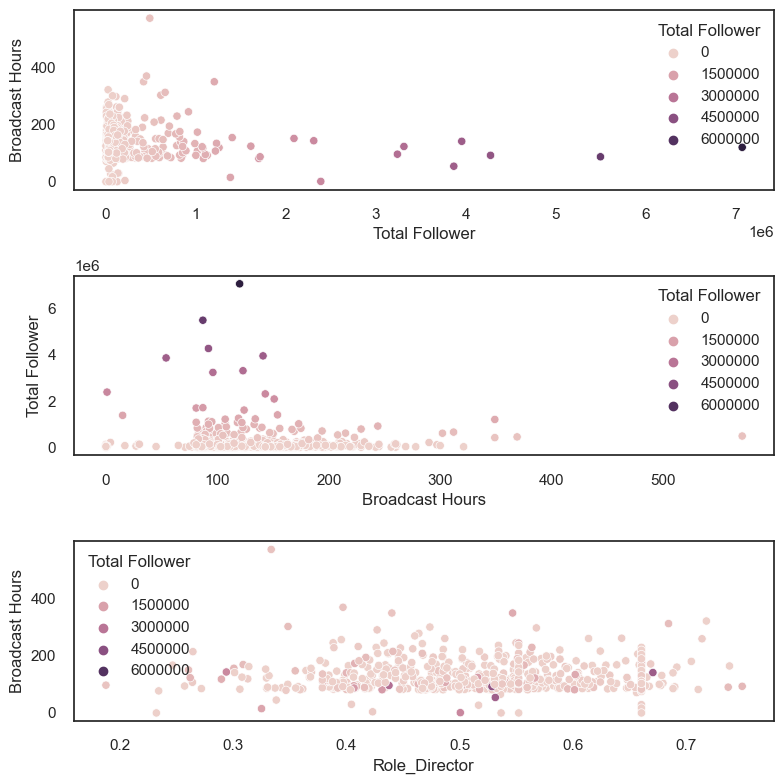

In [101]:
# Running scatter plot visualization
scatters(df_copy, h="Total Follower")

- The three scatter plots above explaining that the density of the data between broadcast hours and total follower were concentrated under the broadcast hour at   400 with total follower number under 10.0000.

- In the second scatterplot we can see that density of the data were concentrated in the middle of broadcast hours and little bit left centered. In more detail explanation the density of the data were located around 90 to 300 broadcast hours in the range of followers under 20.000.

- The last scatterplot was showed that the density of the data were more in the middle. It was at the range of 0.4 to 0.7 in role director and it was under 200 hours of broadcast hours.

from these three scatterplots I already get the characteristic of streamer, namely; 
1. The streamer tend to do more broadcast when they have total follower less than 20.000
2. The streamer who have follower less than 20.0000 would do broadcast around 100 to 300 hours.
3. The streamer who use role director in the range score between 0.4 to 0.7 tend to do broadcast under and equal to 200 hours.


Text(0.5, 0, 'Broadcast Hours')

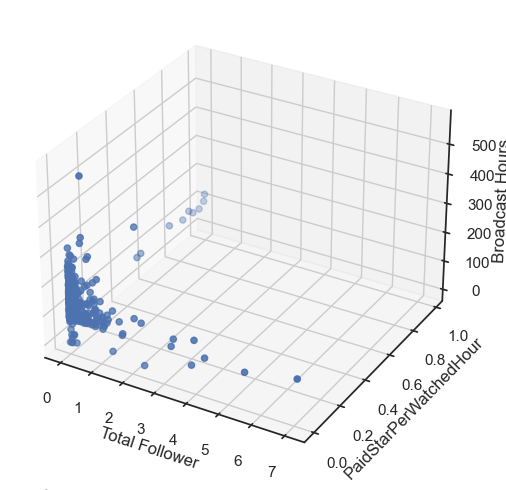

In [102]:
# This code was used for 3D visualization to illustrate the relationship of importance features
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy["Total Follower"], df_copy["PaidStarPerWatchedHour"], df_copy["Broadcast Hours"])
ax.set_xlabel("Total Follower")
ax.set_ylabel("PaidStarPerWatchedHour")
ax.set_zlabel("Broadcast Hours")

The 3D plot above was explaining in the wider dimension regarding the density of data that was concentrated in point where total followers less than 10.000. Paid per watch hour under and equal to 0.4 and the broadcast hour under and equal to 300 hours.

In [103]:
# Checking the dataset
df_copy

,Unnamed: 0,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,96751.0,104,0.004113,0.663442,0.718679,0.288008,0.471456,0.522711,0.337836,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,4781.0,174,0.002855,0.543255,0.427887,0.430609,0.493514,0.348513,0.408481,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,68246.0,83,0.003007,0.527279,0.399873,0.753009,0.472405,0.376854,0.518602,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,142037.0,127,0.005171,0.677222,0.603534,0.407923,0.467787,0.499234,0.571441,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,15416.0,86,0.001213,0.238194,0.543285,0.392993,0.583099,0.469371,0.596872,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,942,330969.0,182,0.001082,0.534637,0.399738,0.548851,0.513117,0.327034,0.383584,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,943,33450.0,102,817000.000000,0.664025,0.597952,0.578953,0.485526,0.475828,0.427368,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,944,29000.0,103,0.000724,0.561336,0.378814,0.547942,0.567108,0.496743,0.389375,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,945,19771.0,143,0.000433,0.600844,0.364150,0.516497,0.685349,0.472747,0.452848,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [104]:
# This code was used to fill the missing value with mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(df_copy)
data = imp_mean.transform(df_copy)

The strategy of simple imputer was to fill the missing value was 'median' because each feature distribution in main-game dataset was not normally distributed or bell shaped curve. That can be seen in pictures 1 which showed all of the feature columns distrubution in red color.

In [105]:
# This code was run standard scaler
scaler = StandardScaler()
scaler.fit(data)
X_scaled=scaler.transform(data)

Before we were doing dimentionality reduction we were going to run standard scaler. The code above was used to standardize all the features in the dataset that were not in the same scale yet.

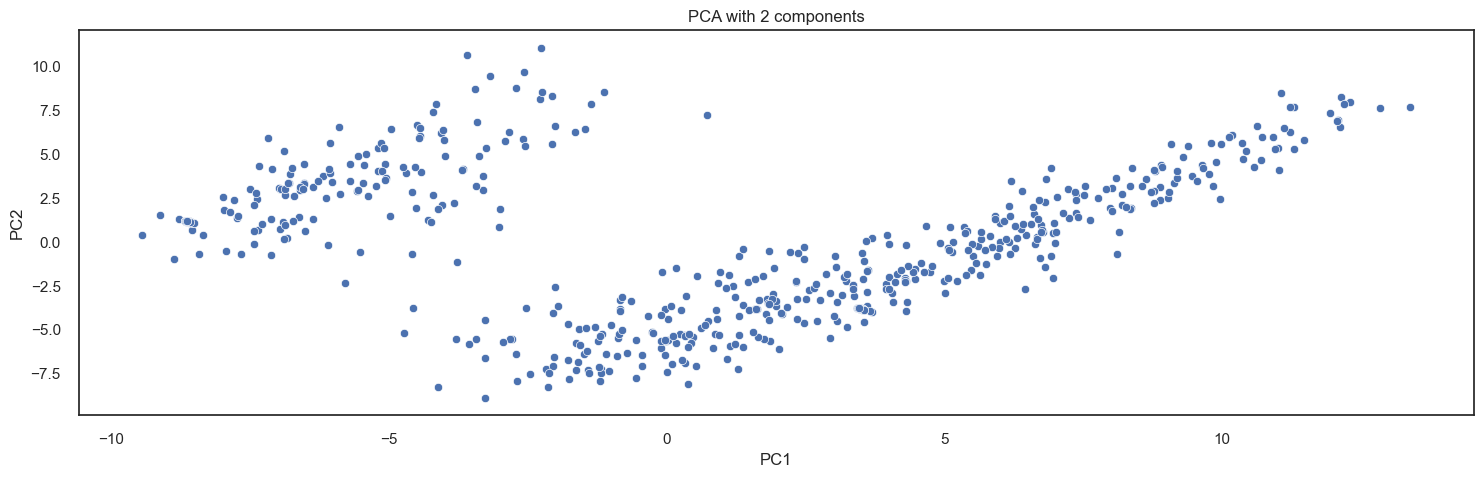

In [106]:
# Dimentional Reduction with PCA
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

The visualization above was showing how PCA reduces the dimention of high dimentionality dataset to be just two dimension which were seen as PC1 and PC2. 

In [107]:
# This code was used to run k-means
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(X_scaled)
                for k in range(1, 9)]

In [108]:
# This seaborn format was re-run to fit in with the two graps below
sns.set(style='white',font_scale=1, rc={'figure.figsize':(10,5)})

### Checking The Optimum Cluster with Elbow Method

The basic idea of elbow method was because it refferred to the elbow in human and when I translated it to unsupervised machine learning it means that we would be taking the lowest marginal diminishing point.In another terminology we can say that would plot the various values of cost with changing k. The point where this distortion declines the most is the elbow point, which works as an optimal value of k.

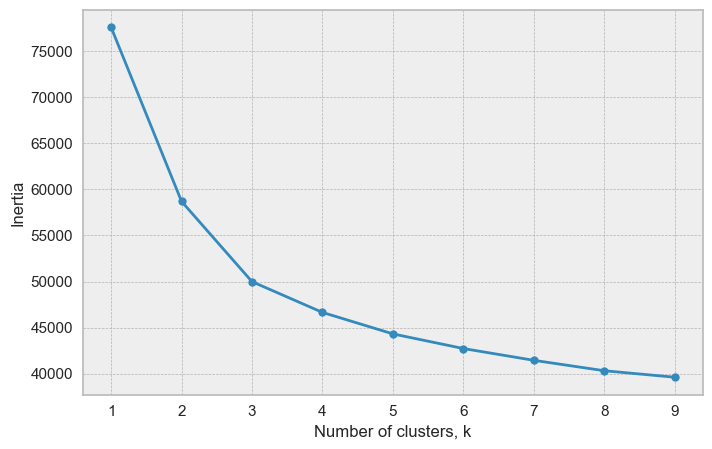

In [109]:
# This code was run to check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In the curve above was explaining the higher the inertia score the higher the variance in a centroid clusters. The purpose of k-means was to catch data which have similarities to be in the same cluster. That was the reason why I would like to choose n cluster when the diminishing marginal of inertia has become less steep after it significantly went down from point 1 to 2. In this case it was clear that n cluster = 3 would be good clusters. If I choose more than 3 the cluster it would be less likely to be differentiated.

### Silhouette analysis

In this part we are going to analyze silhouette coefficient as a metric valuation for k-means algorithm and the value range from -1 to 1. When the silhouette coefficient is 1 means clusters are well apart from each other and clearly distinguished. When the silhouette coefficient is 0 means clusters are indifferent, or we can say the distance between clusters is not significant. Lastly, -1 means k-means clusters are assign in the wrong way.

In [110]:
# This code was run to define k-means
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [111]:
# This code as run to define silhouette scores
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

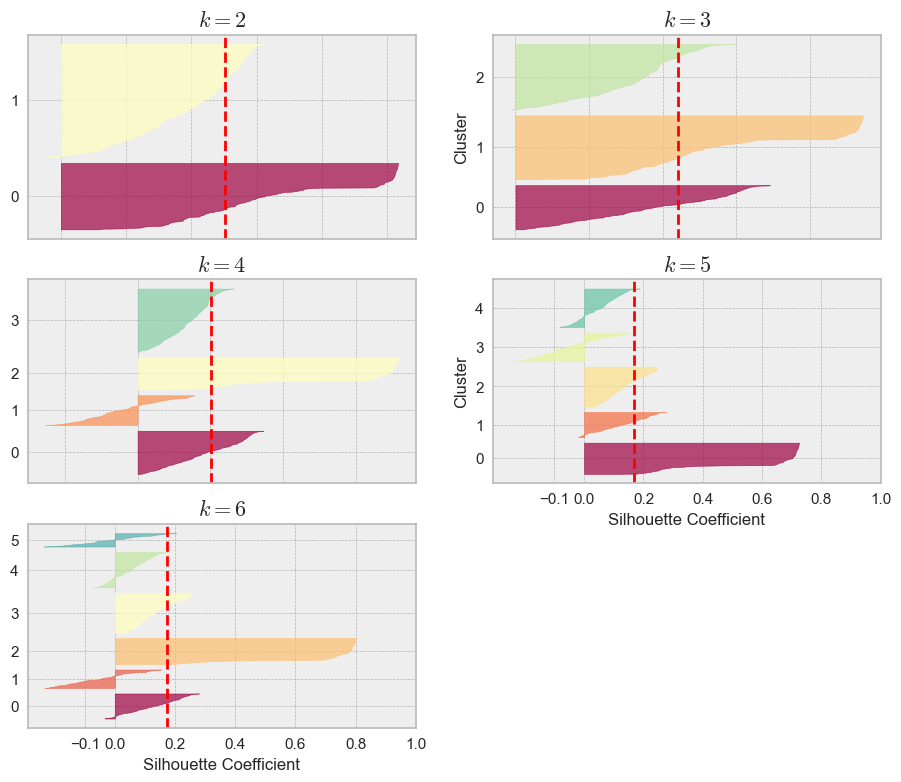

In [112]:
# This code was run to show up silhouette figures
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [113]:
# Defining the amount of cluster that would gonna be tested
range_n_clusters = list(x for x in range (2,10+1))

for num_clusters in range_n_clusters:
    method = KMeans(n_clusters = num_clusters ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 1)
    method.fit(X_scaled)
    cluster_labels = method.labels_
    # Calculating silhouette function score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("Per n_clusters={0}, silhouette coefficient {1}".format(num_clusters, silhouette_avg))

Per n_clusters=2, silhouette coefficient 0.2511269667359918
Per n_clusters=3, silhouette coefficient 0.2209814024031589
Per n_clusters=4, silhouette coefficient 0.20255784219358822
Per n_clusters=5, silhouette coefficient 0.1678071059130583
Per n_clusters=6, silhouette coefficient 0.1741060915587825
Per n_clusters=7, silhouette coefficient 0.17521044956324755
Per n_clusters=8, silhouette coefficient 0.16176571227449146
Per n_clusters=9, silhouette coefficient 0.16094451289860784
Per n_clusters=10, silhouette coefficient 0.1565427613367915


In sihouette bars visualization there were three steps to be considered before deciding the number of n cluster in k-means, namely;
1. They have to surpass the red dots
2. The silhouettes need to be consistent
3. Score in the range -1 to 1, the closer to 1 the better the cluster would be distincted from each cluster.

After I considered the elbow method and the silhouette shapes and scores, I decided to choose n = 3 as the cluster that would significantly be distinctive.

In [114]:
# This code was used to run k means with the chosen n-cluster
kmeans = KMeans(n_clusters=3, random_state=26)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=26)

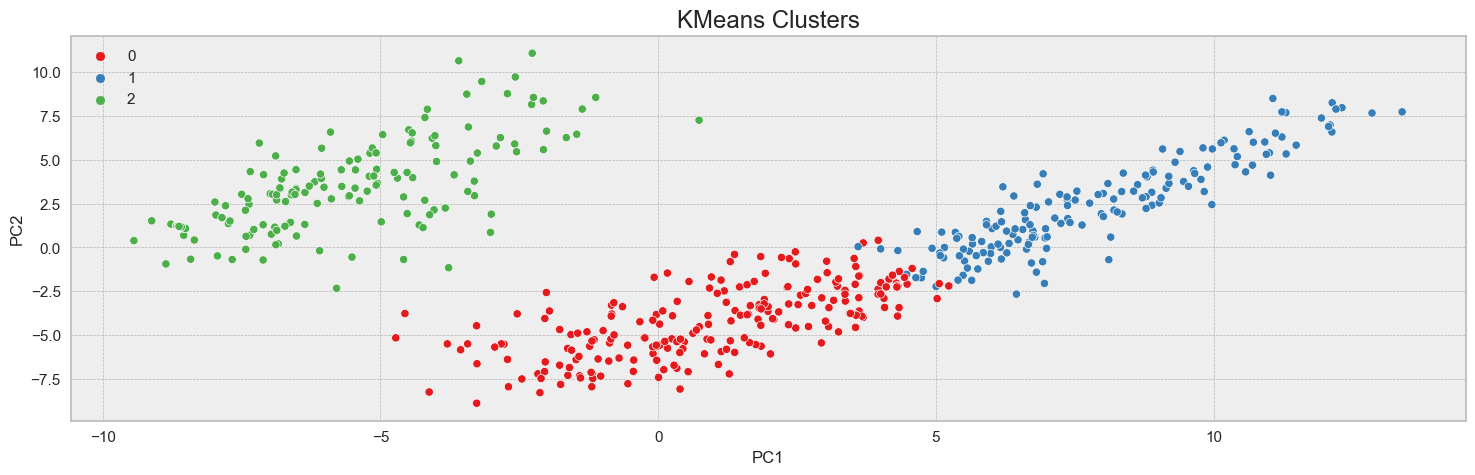

In [115]:
# This code was run to illustrate of how k means differenciate the n-cluster = 3
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In the k-means visualizations picture above we can see that k-means algorithm successfully separated the data to three groups of cluster. There were green cluster, red cluster and blue cluster.

In [116]:
# This code was run to see the cluster in the form of dataset
X_cluster1 = df.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1.head()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric,cluster
0,0,ID,Male,MLBB,96751.0,104,0.004113,0.663442,0.718679,0.288008,...,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625,0
1,1,ID,Male,8 Ball Pool,4781.0,174,0.002855,0.543255,0.427887,0.430609,...,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125,0
2,2,ID,Female,Free Fire 0 Battlegrounds,68246.0,83,0.003007,0.527279,0.399873,0.753009,...,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000,2
3,3,ID,Male,MLBB,142037.0,127,0.005171,0.677222,0.603534,0.407923,...,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000,1
4,4,ID,Male,Free Fire 0 Battlegrounds,15416.0,86,0.001213,0.238194,0.543285,0.392993,...,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125,2


### Cluster Count for K-Means

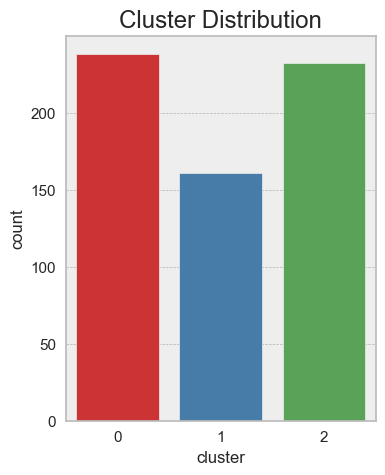

In [117]:
# This code was run to see the count of each cluster
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

The barplots above were explaining that the count of three clusters in the dataset and cout cluster red and green looks little bit similiar and count cluster blue was the lowest.

### Model Inference

The purpose of model inference was to see how good k-mean separate main-game dataset to three clusters and in the end we were going to see the label of main-game dataset clusters.

In [118]:
# this code was run to create inference data
data_inf = df.sample(10, random_state=17)
data_inf

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
587,903,VN,Female,Free Fire 0 Battlegrounds,311785.0,100,0.000803,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
209,212,ID,Female,Free Fire 0 Battlegrounds,57532.0,96,0.010847,0.683887,0.289309,0.571160,...,0.451732,0.632795,0.333645,0.547532,0.599860,0.131429,0.194805,0.279955,0.755450,0.125
547,863,VN,Male,The Last of Us,196718.0,145,0.005211,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
368,485,PH,Male,Grand Theft Auto V,37413.0,168,0.005550,0.574381,0.505571,0.563860,...,0.467097,0.610183,0.332122,0.655896,0.533447,0.669526,0.366601,0.310655,0.782436,0.625
107,109,ID,Male,MLBB,7987.0,141,0.003610,0.697425,0.615751,0.534579,...,0.439867,0.553377,0.322912,0.759258,0.552175,0.567538,0.174085,0.302660,0.790229,0.250
286,403,PH,Female,MLBB,51215.0,109,0.012097,0.548895,0.370939,0.541696,...,0.545772,0.354153,0.340784,0.512856,0.536879,0.300376,0.247404,0.299215,0.699569,0.500
235,352,PH,Male,League of Legends,151274.0,214,0.031874,0.525770,0.247103,0.482699,...,0.404321,0.183271,0.363939,0.491085,0.406235,0.388138,0.000000,0.298309,0.785332,0.000
54,55,ID,Female,Worms Zone,12886.0,91,0.002302,0.602090,0.415402,0.534513,...,0.523457,0.527166,0.382081,0.636348,0.398451,0.521665,0.373724,0.292194,0.781874,1.000
169,172,ID,Male,PUBG,25606.0,81,0.000590,0.695187,0.615390,0.561183,...,0.437606,0.548216,0.322912,0.781823,0.560001,0.593590,0.170239,0.303126,0.795200,0.250
555,871,VN,Male,Arena of Valor,74978.0,121,0.000177,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250


In [119]:
# Creating a copy of inference dataset
inf_copy = data_inf[['Unnamed: 0',
 'Total Follower',
 'Broadcast Hours',
 'PaidStarPerWatchedHour',
 'Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Personal_Values_Facet_Cont_Hedonism',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Temperament_Choleric',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Character_Facet_Cont_ArtisticInterests',
 'Temperament_Sanguine',
 'Character_Facet_Cont_Friendliness',
 'Temperament_Diligent',
 'Self_Esteem_Cont_SELevel',
 'Character_Cont_Extraversion',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Character_Facet_Cont_Adventurousness',
 'Role_Craftsman',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Role_Toastmaster',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Role_Marshal',
 'Self_Esteem_Cont_SELevelAchievements',
 'Self_Esteem_Cont_SEDiscrepancySociability',
 'Personal_Values_Cont_SelfEnhancement',
 'Self_Esteem_Cont_SEAspiration',
 'Role_Supplier',
 'Character_Facet_Cont_Activity',
 'Temperament_Stable',
 'Personal_Values_Facet_Cont_PowerResources',
 'Self_Esteem_Cont_SEDiscrepancyAchievements',
 'Temperament_Melancholic',
 'Character_Cont_Openness',
 'Character_Facet_Cont_Anxiety',
 'Role_Administrator',
 'Character_Facet_Cont_Emotionality',
 'Role_Innovator',
 'Role_Partygoer',
 'Self_Esteem_Cont_SEAspirationSociability',
 'Role_Guru',
 'Personal_Values_Facet_Cont_SelfDirectionThought',
 'Temperament_Phlegmatic',
 'Personal_Values_Facet_Cont_Reputation',
 'Role_Guardian',
 'Role_Keeper',
 'Character_Facet_Cont_Tension',
 'Character_Facet_Cont_Altruism',
 'Personal_Values_Facet_Cont_SecuritySocietal',
 'Self_Esteem_Cont_SEAspirationAchievements',
 'Self_Esteem_Cont_SEAspirationOriginality',
 'Personal_Values_Facet_Cont_Humility',
 'Character_Facet_Cont_Orderliness',
 'Role_Manager',
 'Personal_Values_Facet_Cont_Stimulation',
 'Character_Cont_Neuroticism',
 'Self_Esteem_Cont_SELevelConfidence',
 'Self_Esteem_Cont_SEAspirationConfidence',
 'Role_WiseMan',
 'Self_Esteem_Cont_SEDiscrepancyConfidence',
 'Role_Assistant',
 'Self_Esteem_Cont_SEDiscrepancy',
 'Personal_Values_Facet_Cont_ConformityRules',
 'Self_Esteem_Cont_SEAspirationIntelligence',
 'Self_Esteem_Cont_SELevelSociability',
 'Role_Healer',
 'Role_Operator',
 'Self_Esteem_Cont_SEDiscrepancyAppearance',
 'Personal_Values_Facet_Cont_ConformityInterpersonal',
 'Character_Facet_Cont_Modesty',
 'Self_Esteem_Cont_SEDiscrepancyOriginality',
 'Character_Facet_Cont_Imagination',
 'Role_Coach',
 'Role_RightsDefender',
 'Role_Philanthropist',
 'Personal_Values_Facet_Cont_SelfDirectionAction',
 'Role_Promoter',
 'Personal_Values_Facet_Cont_SecurityPersonal',
 'Personal_Values_Facet_Cont_UniversalismConcern',
 'Role_Advisor',
 'Self_Esteem_Cont_SELevelOriginality',
 'Role_Analyst',
 'Personal_Values_Cont_SelfTranscendence',
 'Personal_Values_Facet_Cont_Achievement',
 'Character_Facet_Cont_Trust',
 'Temperament_Unstable',
 'Character_Cont_Agreeableness',
 'Role_Inventor',
 'Personal_Values_Facet_Cont_BenevolenceCaring',
 'Personal_Values_Facet_Cont_BenevolenceDependability',
 'Character_Facet_Cont_Vulnerability',
 'Character_Facet_Cont_ExcitementSeeking',
 'Role_Designer',
 'Role_Deputy',
 'Personal_Values_Cont_OpennessToChange',
 'PaidStarPerWatchedHour.1',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_Depression',
 'Role_Strategist',
 'Role_Inspector',
 'Self_Esteem_Cont_SEAspirationAppearance',
 'Character_Facet_Cont_SelfDiscipline',
 'Self_Esteem_Cont_SEDiscrepancyIntelligence',
 'Role_Companion',
 'Character_Facet_Cont_Cooperation',
 'Role_Commander',
 'Role_Activist',
 'Personal_Values_Facet_Cont_UniversalismNature',
 'Role_Charismatic',
 'Personal_Values_Facet_Cont_Tradition',
 'Self_Esteem_Cont_SELevelAppearance',
 'Character_Facet_Cont_Assertiveness',
 'Character_Facet_Cont_Cautiousness',
 'Role_Curator',
 'Personal_Values_Cont_Conservation',
 'Self_Esteem_Cont_SELevelIntelligence',
 'Temperament_Centric']]

In [120]:
# Defining the simple inputer for inference data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(inf_copy)
data = imp_mean.transform(inf_copy)

In [121]:
# Defining standard scaler for inference data
scaler = StandardScaler()
scaler.fit(data)
X_scaled=scaler.transform(data)

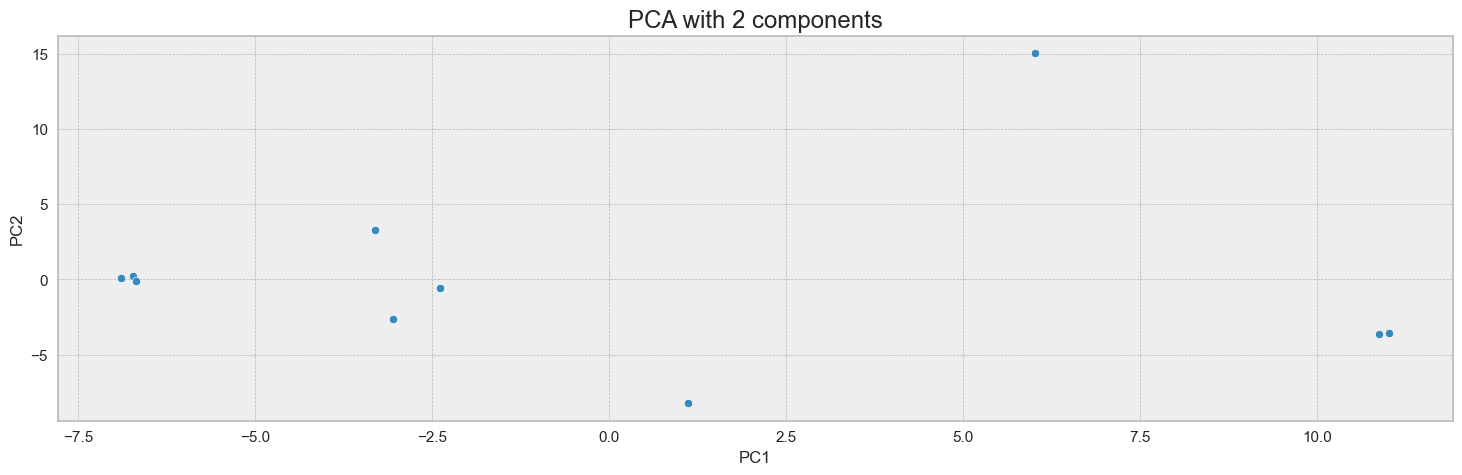

In [122]:
# Defining PCA for inference data
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

In [123]:
# Defining k-means for inference data
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [124]:
# defining y cluster for inference data
y_cluster = kmean.fit_predict(X_scaled)

In [125]:
# checking the y cluster dimension, it should be shown array instead of metrics
y_cluster

array([1, 1, 1, 1, 0, 1, 2, 1, 0, 1], dtype=int32)

In [126]:
# Adding cluster to column of dataset inference
data_inf['Cluster'] = y_cluster

In [127]:
# dataset inference after adding the cluster column
data_inf

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric,Cluster
587,903,VN,Female,Free Fire 0 Battlegrounds,311785.0,100,0.000803,0.561336,0.378814,0.547942,...,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250,1
209,212,ID,Female,Free Fire 0 Battlegrounds,57532.0,96,0.010847,0.683887,0.289309,0.571160,...,0.632795,0.333645,0.547532,0.599860,0.131429,0.194805,0.279955,0.755450,0.125,1
547,863,VN,Male,The Last of Us,196718.0,145,0.005211,0.561336,0.378814,0.547942,...,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250,1
368,485,PH,Male,Grand Theft Auto V,37413.0,168,0.005550,0.574381,0.505571,0.563860,...,0.610183,0.332122,0.655896,0.533447,0.669526,0.366601,0.310655,0.782436,0.625,1
107,109,ID,Male,MLBB,7987.0,141,0.003610,0.697425,0.615751,0.534579,...,0.553377,0.322912,0.759258,0.552175,0.567538,0.174085,0.302660,0.790229,0.250,0
286,403,PH,Female,MLBB,51215.0,109,0.012097,0.548895,0.370939,0.541696,...,0.354153,0.340784,0.512856,0.536879,0.300376,0.247404,0.299215,0.699569,0.500,1
235,352,PH,Male,League of Legends,151274.0,214,0.031874,0.525770,0.247103,0.482699,...,0.183271,0.363939,0.491085,0.406235,0.388138,0.000000,0.298309,0.785332,0.000,2
54,55,ID,Female,Worms Zone,12886.0,91,0.002302,0.602090,0.415402,0.534513,...,0.527166,0.382081,0.636348,0.398451,0.521665,0.373724,0.292194,0.781874,1.000,1
169,172,ID,Male,PUBG,25606.0,81,0.000590,0.695187,0.615390,0.561183,...,0.548216,0.322912,0.781823,0.560001,0.593590,0.170239,0.303126,0.795200,0.250,0
555,871,VN,Male,Arena of Valor,74978.0,121,0.000177,0.561336,0.378814,0.547942,...,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250,1


In [159]:
# This code was run to see features in inference dataset
data_inf.select_dtypes(include=np.number).columns.tolist()

['Unnamed: 0',
 'Total Follower',
 'Broadcast Hours',
 'PaidStarPerWatchedHour',
 'Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Personal_Values_Facet_Cont_Hedonism',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Temperament_Choleric',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Character_Facet_Cont_ArtisticInterests',
 'Temperament_Sanguine',
 'Character_Facet_Cont_Friendliness',
 'Temperament_Diligent',
 'Self_Esteem_Cont_SELevel',
 'Character_Cont_Extraversion',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Character_Facet_Cont_Adventurousness',
 'Role_Craftsman',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Role_Toastmaster',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Role_Marshal',
 'Self_Esteem_Cont_SELevelAchievements',
 'Self_Est

### Final Result

In [129]:
inf_copy_cluster = data_inf[['Country','Game',
 'Total Follower',
 'Broadcast Hours',
 'PaidStarPerWatchedHour','Cluster']]
inf_copy_cluster

,Country,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Cluster
587,VN,Free Fire 0 Battlegrounds,311785.0,100,0.000803,1
209,ID,Free Fire 0 Battlegrounds,57532.0,96,0.010847,1
547,VN,The Last of Us,196718.0,145,0.005211,1
368,PH,Grand Theft Auto V,37413.0,168,0.005550,1
107,ID,MLBB,7987.0,141,0.003610,0
286,PH,MLBB,51215.0,109,0.012097,1
235,PH,League of Legends,151274.0,214,0.031874,2
54,ID,Worms Zone,12886.0,91,0.002302,1
169,ID,PUBG,25606.0,81,0.000590,0
555,VN,Arena of Valor,74978.0,121,0.000177,1


From the sample of final result above we can see that games such as Free Fire, The Last of Us, GTA V, MLBB, Worms Zone, and Arena of Valor were in cluster 1, and game such as Leage of legends was in cluster 2, lastly game such as PUBG was in cluster 0. The interesting point here was MLBB was appeared in two different clusters which are cluster 0, and cluster 1.

### Analyzing Data Based on Follower Order

In [155]:
inf_copy_cluster.sort_values(by='Total Follower', ascending=False)

,Country,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Cluster
587,VN,Free Fire 0 Battlegrounds,311785.0,100,0.000803,1
547,VN,The Last of Us,196718.0,145,0.005211,1
235,PH,League of Legends,151274.0,214,0.031874,2
555,VN,Arena of Valor,74978.0,121,0.000177,1
209,ID,Free Fire 0 Battlegrounds,57532.0,96,0.010847,1
286,PH,MLBB,51215.0,109,0.012097,1
368,PH,Grand Theft Auto V,37413.0,168,0.005550,1
169,ID,PUBG,25606.0,81,0.000590,0
54,ID,Worms Zone,12886.0,91,0.002302,1
107,ID,MLBB,7987.0,141,0.003610,0


The table above was showing that top three games played by streamer with the highest follower were Free Fire, The Last of Us, and League of Legends and those were located in Vietnam, Vietnam, and Philipine respectively.

### Analyzing Data Based on Paid Per Watch Hour Order

In [157]:
inf_copy_cluster.sort_values(by='PaidStarPerWatchedHour', ascending=False)

,Country,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Cluster
235,PH,League of Legends,151274.0,214,0.031874,2
286,PH,MLBB,51215.0,109,0.012097,1
209,ID,Free Fire 0 Battlegrounds,57532.0,96,0.010847,1
368,PH,Grand Theft Auto V,37413.0,168,0.005550,1
547,VN,The Last of Us,196718.0,145,0.005211,1
107,ID,MLBB,7987.0,141,0.003610,0
54,ID,Worms Zone,12886.0,91,0.002302,1
587,VN,Free Fire 0 Battlegrounds,311785.0,100,0.000803,1
169,ID,PUBG,25606.0,81,0.000590,0
555,VN,Arena of Valor,74978.0,121,0.000177,1


The table above was showing that the top three game played by streamer with the highest Paid Star Per Watched Hour were League of Legends, MLBB, and Free Fire and those were located in Philipine, Philipine, and Indonesia respectively.

### Analyzing Data Based on Broadcast Hours

In [160]:
inf_copy_cluster.sort_values(by='Broadcast Hours', ascending=False)

,Country,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Cluster
235,PH,League of Legends,151274.0,214,0.031874,2
368,PH,Grand Theft Auto V,37413.0,168,0.005550,1
547,VN,The Last of Us,196718.0,145,0.005211,1
107,ID,MLBB,7987.0,141,0.003610,0
555,VN,Arena of Valor,74978.0,121,0.000177,1
286,PH,MLBB,51215.0,109,0.012097,1
587,VN,Free Fire 0 Battlegrounds,311785.0,100,0.000803,1
209,ID,Free Fire 0 Battlegrounds,57532.0,96,0.010847,1
54,ID,Worms Zone,12886.0,91,0.002302,1
169,ID,PUBG,25606.0,81,0.000590,0


The table above was explaining that the top three game based on broadcast hours were League of Legends, Grand Theft Auto V, and The Last of Us. One interesting findings here were MLBB game that was played in Indonesia which had lower follower and paid star per watched hour compared than MLBB that was played in Philipine apparently had shown that it had more broadcast hours in Indonesia than in Philipine.

### Clustering Insight from The Side of Gamers Point of View

In [144]:
data_game = {'Game'     :['Free Fire', 'The Last of Us', 'GTA V','MLBB','MLBB', 'League of Legends', 'Worms Zone', 'PUBG', 'Arena of Valor'],
             'Type'     :['Mobile','PC & Console','PC & Console','Mobile','Mobile','Mobile', 'Mobile & Web', 'PC & Console', 'Mobile'],
             'Genre'    :['Battle Royale','Action-adventure','Action-adventure','MOBA', 'MOBA','MOBA','Action Game', 'Battle Royale', 'MOBA'],
             'Clusters' :[1, 1, 1, 0, 1, 2, 1, 0, 1]}
data_game_sample = pd.DataFrame(data_game)
data_game_sample

,Game,Type,Genre,Clusters
0,Free Fire,Mobile,Battle Royale,1
1,The Last of Us,PC & Console,Action-adventure,1
2,GTA V,PC & Console,Action-adventure,1
3,MLBB,Mobile,MOBA,0
4,MLBB,Mobile,MOBA,1
5,League of Legends,Mobile,MOBA,2
6,Worms Zone,Mobile & Web,Action Game,1
7,PUBG,PC & Console,Battle Royale,0
8,Arena of Valor,Mobile,MOBA,1


As a gamer I could assign Free Fire, MLBB, League of Legends, Worms Zone, Arena of Valor as mobile games and The Last of Us, GTA V, PUBG as computer games. The genre of those games are different and it also can be seen in the table above.

### Conclusion

The main game dataset consisted from a lot of features and it would be laborious to find out the differentiation or to measure how different the data on each columns. We were using K-means to get the dataset characteristics by separating the groups of data that were completely different from the other clusters. Based on our findings, three clusters were the optimum cluster that could be implemented on this research. That means one group of data can be stated significantly different than the other group of data, and that can also be seen on the PCA scatterplot.

After looking thoroughly to the dataset cluster we found out that the characteristics of streamers in Indonesia and Philipine were different. In the table analyzing data by follower order it can be seen that streamer from Indonesia who play MLBB were less popular compared to the streamer from Philipine which played the same game. In the table analyzing data based on paid star per watch hour order it was also showed that streamers from Philipine were get paid higher compared from the sreamers from Indonesia. By analyzing that MLBB that were separated in different cluster we can conclude that the same game could be located in the different clusters because they were located in the different data points. 





When we analyzing based on broadcast hours we found that MLBB game that was played in Indonesia which had lower follower and paid star per watched hour compared than MLBB that was played in Philipine apparently had shown that it had more broadcast hours in Indonesia than in Philipine.

### Business Insight

If I am an entrepreneur and I would like to open a computer store in one of those countries such as Indonesia, Vietnam, and Philipine I think I would open it in Vietnam because The Last of Us was in the top three based on broad cast hours and it was also at the top two based on followers. The reasons was The Last of Us was a AAA game which was really graphics demanding so the demand of graphic cards would be higher in the location where this game was loveable. 

GTA V can also be considered because it was at the top three of broadcast hours nevertheless the job of streamer was giving the affirmation its follower to do what they were doing such as playing the game they were playing. By considering that I chose The Last of Us instead of GTA V, and the streamer who play The Last of Us and having the followers number at the top three were from Vietnam. That was why it would be make sense to supply graphic card or computer gaming in Vietnam.

#### Insight For Streamer

From the main-game dataset we were getting the very clear information that streamer that was in the cluster 2 were streames that show up at the top paid star per watch our. Interestingly the streamer in that cluster were also in the top three for both broadcast hours and total followers. By identify this insight from few features the other streamer can follow the behaviour of the streamer in the cluster two to earn more paid star per watched our.

### Improvement

If I had been give seven days to extent this research I would like to draw more visualizations regarding the final result of the cluster from main-game dataset. Because visualization data would be much more easier to discern for many people from different background and in this regards were the operation teams and executive management. The findings of this research would the guidance for them to decide at which country, and game that they need be paid attention more.

### Reference

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

https://towardsdatascience.com/imputing-missing-values-using-the-simpleimputer-class-in-sklearn-99706afaff46

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html